#### Mesure du Flux au niveau de l'échantillon sur Polyphem

- Utilisation de la sonde AXUV100, réglage du gain du phantom sur $10^8$ en mode **Low**
- Synchrotron: 450 Ma
- Mesures effectuées à la main avec le multimètre le 14/09/2023

- Les fentes sont à 0.65 et 0.65 sur l'interface MicroManager
- Au 40x (objectif n°2)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as p

In [2]:
%mkdir data
%mkdir figures

mkdir: impossible de créer le répertoire « data »: Le fichier existe
mkdir: impossible de créer le répertoire « figures »: Le fichier existe


## Numérisation des données

In [6]:
GainPhantom = 1e-8
W = list(range(200, 340+5, 5))
V = [6.9e-2,
     6.92e-2,
     6.94e-2,
     7.03e-2,
     7.55e-2,
     8.25e-2,
     9.59e-2,
     1.3e-1,
     2.01e-1,
     2.81e-1,
     4.03e-1,
     5.56e-1,
     7.16e-1,
     9.45e-1,
     1.27,
     1.163,
     9.12e-1,
     6.00e-1,
     3.40e-1,
     1.75e-1,
     1.49e-1,
     1.35e-1,
     1.18e-1,
     1.17e-1,
     1.33e-1,
     1.49e-1,
     1.53e-1,
     1.44e-1,
     1.40e-1
]

print(len(W), len(V))
data = p.DataFrame({'W (nm)': W, 
                    'V (V)': V
                   })
#data.to_csv('./data/data_diode_polypheme_14092023_sample_x40.csv')
data

29 29


W (nm)   V (V)
0      200  0.0690
1      205  0.0692
2      210  0.0694
3      215  0.0703
4      220  0.0755
5      225  0.0825
6      230  0.0959
7      235  0.1300
8      240  0.2010
9      245  0.2810
10     250  0.4030
11     255  0.5560
12     260  0.7160
13     265  0.9450
14     270  1.2700
15     275  1.1630
16     280  0.9120
17     285  0.6000
18     290  0.3400
19     295  0.1750
20     300  0.1490
21     305  0.1350
22     310  0.1180
23     315  0.1170
24     320  0.1330
25     325  0.1490
26     330  0.1530
27     335  0.1440
28     340  0.1400

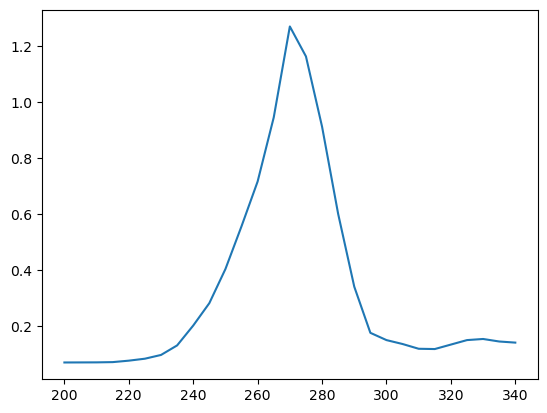

In [7]:
plt.plot(data['W (nm)'], data['V (V)'])

## Chargement des courbes de calibration de la diode

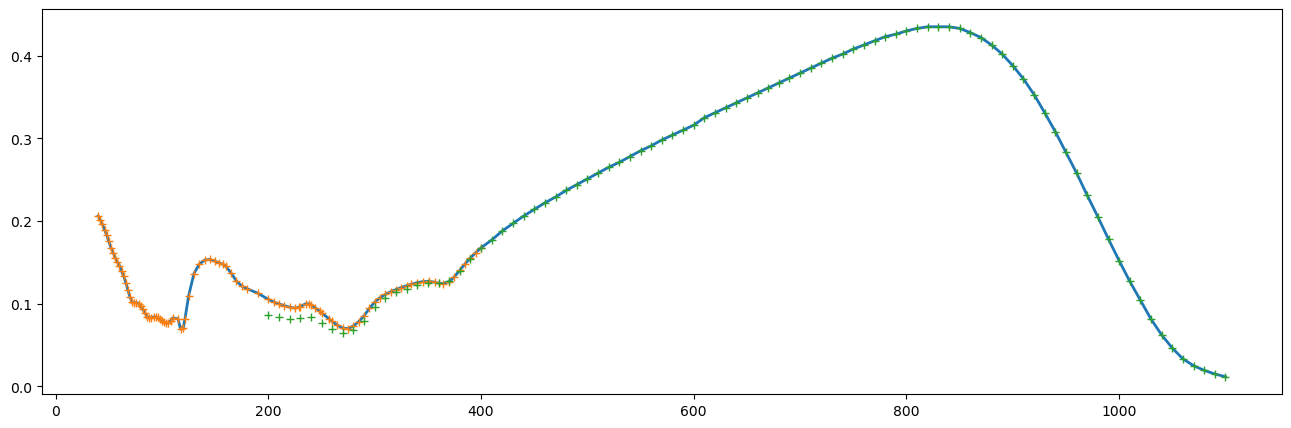

In [8]:
calibUV = p.read_csv('./data/calibration_sonde_AXUV100/AXUV_calibration_40-400nm.csv', skiprows=4, names=('W (nm)', 'R (A/W)'))
calibVIS = p.read_csv('./data/calibration_sonde_AXUV100/AXUV_calibration_200-1100nm.csv', skiprows=4, names=('W (nm)', 'reflectance', 'R (A/W)', 'External QR', 'Internal QE'))

# On met ensemble les deux séries on prend calibUV puis à la fin on enchaine sur calibVIS
calibMerged = p.concat((calibUV, calibVIS[calibVIS['W (nm)'] > calibUV['W (nm)'].max()]))

# Plot pour voir 
plt.figure(figsize=(16,5))
plt.plot(calibMerged['W (nm)'], calibMerged['R (A/W)'], '-', lw=2)
plt.plot(calibUV['W (nm)'], calibUV['R (A/W)'], '+')
plt.plot(calibVIS['W (nm)'], calibVIS['R (A/W)'], '+')

## Convertion des données pour avoir l'intensité, la puissance et le Flux

- Le flux de photons $\phi$ unité $\frac{photons}{s\, m^2}$ soit des photons par second métres carrés
$$ H = \phi \times \frac{hc}{\lambda}$$
Avec $H$ la puissance par mètre carré $[W/m^2]$, $h$ la constant de Plank, $c$ la célérité de la lumière, et $\lambda$ la longueur d'onde

In [9]:
# Pour avoir le courant I en ampère
data['I (A)'] = data['V (V)'] * GainPhantom

# Pour avoir la puissance (on utilise la calibration que l'on interpole lineairement au bonnes longueus d'ondes)
calib = np.interp(data['W (nm)'], calibMerged['W (nm)'], calibMerged['R (A/W)'])
data['P (W)'] = data['I (A)'] / calib

h = 6.62e-34
c = 2.99e8
data['Flux'] = ( data['P (W)'] * data['W (nm)'] * 10e-9 ) / (c*h)

data.to_csv('./data/data_flux_polypheme_14092023_sample_x40.csv')
data

W (nm)   V (V)         I (A)         P (W)          Flux
0      200  0.0690  6.900000e-10  6.558935e-09  6.627262e+10
1      205  0.0692  6.920000e-10  6.784314e-09  7.026363e+10
2      210  0.0694  6.940000e-10  6.960883e-09  7.385067e+10
3      215  0.0703  7.030000e-10  7.210256e-09  7.831771e+10
4      220  0.0755  7.550000e-10  7.889237e-09  8.768565e+10
5      225  0.0825  8.250000e-10  8.720930e-09  9.913252e+10
6      230  0.0959  9.590000e-10  9.948133e-09  1.155953e+11
7      235  0.1300  1.300000e-09  1.302605e-08  1.546506e+11
8      240  0.2010  2.010000e-09  2.036474e-08  2.469227e+11
9      245  0.2810  2.810000e-09  2.982058e-08  3.691076e+11
10     250  0.4030  4.030000e-09  4.533183e-08  5.725509e+11
11     255  0.5560  5.560000e-09  6.643207e-08  8.558325e+11
12     260  0.7160  7.160000e-09  9.109415e-08  1.196560e+12
13     265  0.9450  9.450000e-09  1.279028e-07  1.712367e+12
14     270  1.2700  1.270000e-08  1.809117e-07  2.467750e+12
15     275  1.1630  1.163000e-08  1.666189e-07  2.314876e+12
16     280  0.9120  9.120000e-09  1.247606e-07  1.764844e+12
17     285  0.6000  6.000000e-09  7.662835e-08  1.103329e+12
18     290  0.3400  3.400000e-09  3.981265e-08  5.832972e+11
19     295  0.1750  1.750000e-09  1.855779e-08  2.765790e+11
20     300  0.1490  1.490000e-09  1.463654e-08  2.218353e+11
21     305  0.1350  1.350000e-09  1.258155e-08  1.938674e+11
22     310  0.1180  1.180000e-09  1.061151e-08  1.661919e+11
23     315  0.1170  1.170000e-09  1.022727e-08  1.627576e+11
24     320  0.1330  1.330000e-09  1.135781e-08  1.836181e+11
25     325  0.1490  1.490000e-09  1.246862e-08  2.047258e+11
26     330  0.1530  1.530000e-09  1.257190e-08  2.095973e+11
27     335  0.1440  1.440000e-09  1.164363e-08  1.970626e+11
28     340  0.1400  1.400000e-09  1.116427e-08  1.917698e+11

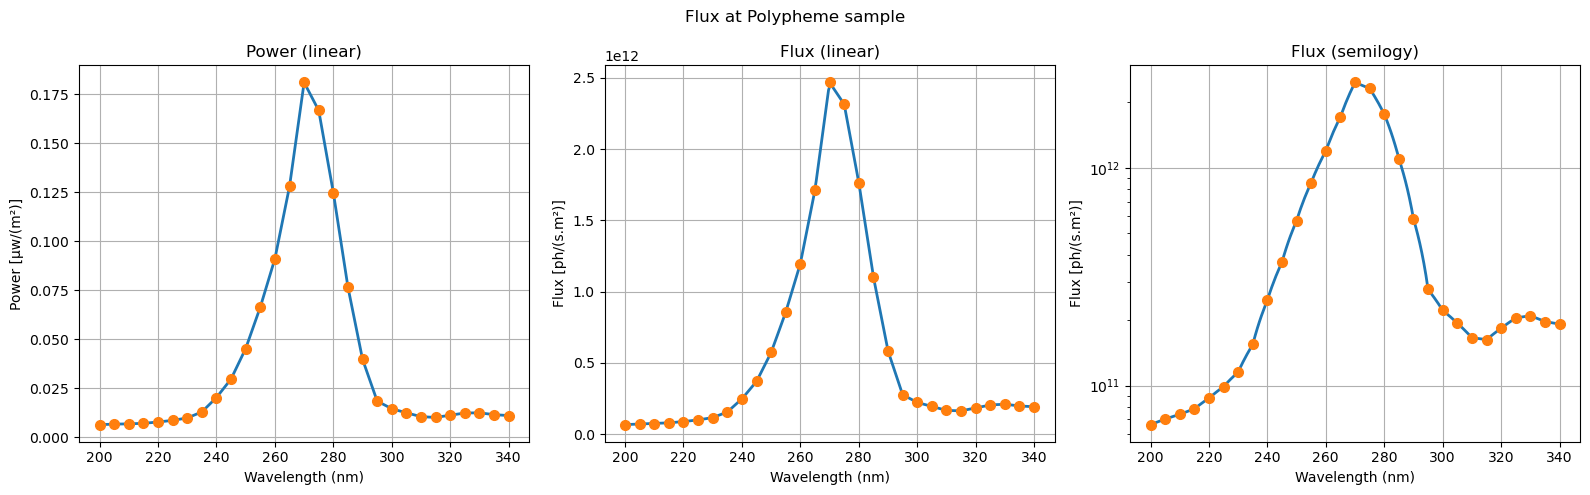

In [10]:
x = np.linspace(data['W (nm)'].min(), data['W (nm)'].max(), 200)
fit = np.interp(x, data['W (nm)'], data['Flux'])

plt.figure(figsize=(16,5))
plt.subplot(131)
plt.plot(data['W (nm)'], data['P (W)']*1e6, '-', lw=2)
plt.plot(data['W (nm)'], data['P (W)']*1e6, 'o', ms=7)
plt.grid()
plt.ylabel('Power [µw/(m²)]')
plt.xlabel('Wavelength (nm)')
plt.title('Power (linear)')

plt.subplot(132)
plt.plot(x, fit, lw=2)
plt.plot(data['W (nm)'], data['Flux'], 'o', ms=7)
plt.grid()
plt.ylabel('Flux [ph/(s.m²)]')
plt.xlabel('Wavelength (nm)')
plt.title('Flux (linear)')

plt.subplot(133)
plt.semilogy(x, fit, lw=2)
plt.semilogy(data['W (nm)'], data['Flux'], 'o', ms=7)
plt.grid()
plt.ylabel('Flux [ph/(s.m²)]')
plt.xlabel('Wavelength (nm)')
plt.title('Flux (semilogy)')

plt.suptitle('Flux at Polypheme sample')
plt.tight_layout()

plt.savefig('./figures/Flux_Polypheme_14092023_sample_x40.pdf')
plt.savefig('./figures/Flux_Polypheme_14092023_sample_x40.png')